DNotebook compares the observed and predicted precipitation amounts for provider DarkSky

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
#reading in predicted amounts from DarkSky
df = pd.read_csv("forecastNew.csv")

In [3]:
df.tail()

,Provider,Location,One_Day_Ahead,DateOne,Three_Days_Ahead,DateThree,Five_Days_Ahead,DateFive,Date_Scraped
237,DarkSky,Wexford,0.1388,2020-03-30,0.2444,2020-04-01,1.0814,2020-04-03,2020-03-29
238,DarkSky,Wexford,0.1331,2020-04-03,2.1161,2020-04-05,0.0954,2020-04-07,2020-04-02
239,DarkSky,Wexford,0.3598,2020-03-03,2.6522,2020-03-05,4.0729,2020-03-07,2020-03-02
240,DarkSky,Wexford,2.1494,2020-02-22,3.5048,2020-02-24,0.3246,2020-02-26,2020-02-21
241,DarkSky,Wexford,0.9896,2020-02-17,2.2045,2020-02-19,0.1221,2020-02-21,2020-02-16


In [4]:
#reading in the observed amounts for DarkSky
actuals = pd.read_csv("observedValues.csv", names=['Date', 'Amounts', 'Location'])

In [5]:
actuals.tail()

,Date,Amounts,Location
335,2020-03-27,0.0792,Wexford
336,2020-03-28,0.0144,Wexford
337,2020-03-29,0.0000,Wexford
338,2020-03-30,0.1128,Wexford
339,2020-03-31,0.0576,Wexford


### One Day Ahead Predicted

In [6]:
#creating a df for one day ahead predicted values
OneDayAhead = df[['Provider','Location', 'One_Day_Ahead', 'DateOne']].copy()

In [7]:
#changing date from object to a datetime
OneDayAhead['Date'] = pd.to_datetime(OneDayAhead['DateOne'])

In [8]:
#sorting the df by date
OneDayAhead = OneDayAhead.sort_values(by='DateOne')

### Actuals

In [9]:
#changing column date from object to datetime in the actuals df
actuals['Date']= pd.to_datetime(actuals['Date'])

In [10]:
actuals.tail()

,Date,Amounts,Location
335,2020-03-27,0.0792,Wexford
336,2020-03-28,0.0144,Wexford
337,2020-03-29,0.0000,Wexford
338,2020-03-30,0.1128,Wexford
339,2020-03-31,0.0576,Wexford


In [11]:
#getting the portion of dates which are relevant to the predicted dates
start_date = '2020-02-04'
end_date = '2020-03-31'
mask = (actuals['Date'] >= start_date) & (actuals['Date'] <= end_date)

In [12]:
actual = actuals.loc[mask]

In [13]:
actual = actual.sort_values(by='Date')

In [14]:
actual

,Date,Amounts,Location
28,2020-02-04,0.5088,Dublin
113,2020-02-04,0.7968,Mayo
283,2020-02-04,0.0648,Wexford
198,2020-02-04,2.3856,Donegal
284,2020-02-05,0.0480,Wexford
...,...,...,...
83,2020-03-30,0.2568,Dublin
169,2020-03-31,0.0552,Mayo
84,2020-03-31,0.1464,Dublin
254,2020-03-31,0.2376,Donegal


In [15]:
#merging actuals and onedayahead on the columns date and location
result = pd.merge(OneDayAhead, actual, on=['Date', 'Location'])

In [16]:
result

,Provider,Location,One_Day_Ahead,DateOne,Date,Amounts
0,DarkSky,Donegal,2.8255,2020-02-04,2020-02-04,2.3856
1,DarkSky,Mayo,2.5145,2020-02-04,2020-02-04,0.7968
2,DarkSky,Wexford,0.4756,2020-02-04,2020-02-04,0.0648
3,DarkSky,Dublin,0.5665,2020-02-04,2020-02-04,0.5088
4,DarkSky,Dublin,0.0716,2020-02-05,2020-02-05,0.0480
...,...,...,...,...,...,...
223,DarkSky,Donegal,0.0405,2020-03-30,2020-03-30,0.1488
224,DarkSky,Wexford,0.0994,2020-03-31,2020-03-31,0.0576
225,DarkSky,Mayo,0.0546,2020-03-31,2020-03-31,0.0552
226,DarkSky,Donegal,0.1552,2020-03-31,2020-03-31,0.2376


In [17]:
#getting the difference between the observed and predicted precipitation amounts
result["Difference"] = result['One_Day_Ahead'] - result['Amounts']

In [18]:
result

,Provider,Location,One_Day_Ahead,DateOne,Date,Amounts,Difference
0,DarkSky,Donegal,2.8255,2020-02-04,2020-02-04,2.3856,0.4399
1,DarkSky,Mayo,2.5145,2020-02-04,2020-02-04,0.7968,1.7177
2,DarkSky,Wexford,0.4756,2020-02-04,2020-02-04,0.0648,0.4108
3,DarkSky,Dublin,0.5665,2020-02-04,2020-02-04,0.5088,0.0577
4,DarkSky,Dublin,0.0716,2020-02-05,2020-02-05,0.0480,0.0236
...,...,...,...,...,...,...,...
223,DarkSky,Donegal,0.0405,2020-03-30,2020-03-30,0.1488,-0.1083
224,DarkSky,Wexford,0.0994,2020-03-31,2020-03-31,0.0576,0.0418
225,DarkSky,Mayo,0.0546,2020-03-31,2020-03-31,0.0552,-0.0006
226,DarkSky,Donegal,0.1552,2020-03-31,2020-03-31,0.2376,-0.0824


In [19]:
import matplotlib.pyplot as plt  

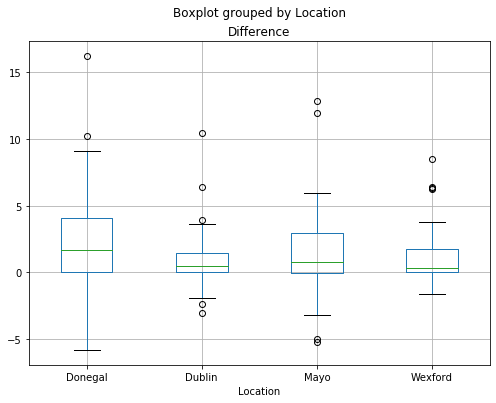

In [20]:
#creating boxplot of the difference by location
boxplotOne = result.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6), )

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# getting the RMSE of the columns
rms = sqrt(mean_squared_error(result["Amounts"], result["One_Day_Ahead"]))
rms

3.164684380732006

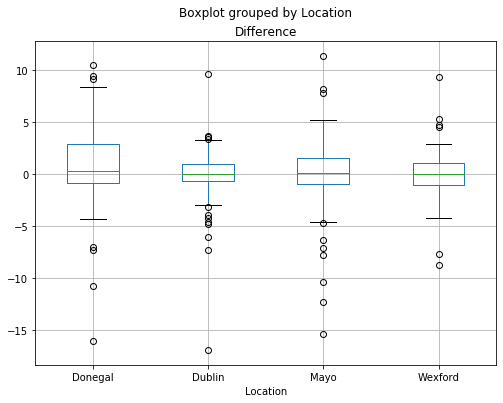

In [23]:
#doing the same as above but with three day ahead
ThreeDayAhead = df[['Provider','Location', 'Three_Days_Ahead', 'DateThree']].copy()
ThreeDayAhead['Date'] = pd.to_datetime(ThreeDayAhead['DateThree'])
resultThree = pd.merge(ThreeDayAhead, actual, on=['Date', 'Location'])
resultThree["Difference"] = resultThree['Three_Days_Ahead'] - resultThree['Amounts']
boxplotThree = resultThree.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))


In [24]:
rmsThree = sqrt(mean_squared_error(resultThree["Amounts"], resultThree["Three_Days_Ahead"]))
rmsThree

3.931628065394105

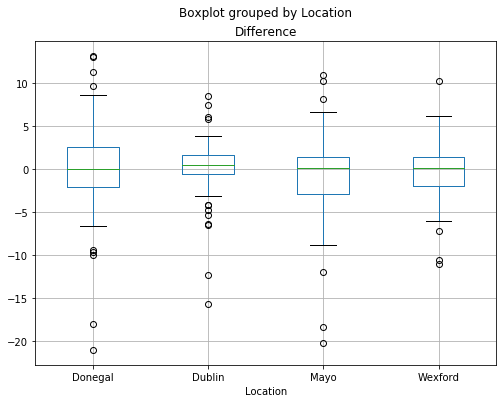

In [25]:
#doing the same as above but with five day ahead
FiveDayAhead = df[['Provider','Location', 'Five_Days_Ahead', 'DateFive']].copy()
FiveDayAhead['Date'] = pd.to_datetime(FiveDayAhead['DateFive'])
resultFive = pd.merge(FiveDayAhead, actual, on=['Date', 'Location'])
resultFive["Difference"] = resultFive['Five_Days_Ahead'] - resultFive['Amounts']
boxplotFive = resultFive.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))

In [26]:
rmsFive = sqrt(mean_squared_error(resultFive["Amounts"], resultFive["Five_Days_Ahead"]))
rmsFive

5.058302512179321

In [27]:
resultFive

,Provider,Location,Five_Days_Ahead,DateFive,Date,Amounts,Difference
0,DarkSky,Donegal,0.1252,2020-03-20,2020-03-20,0.0864,0.0388
1,DarkSky,Donegal,0.8009,2020-03-27,2020-03-27,0.0360,0.7649
2,DarkSky,Donegal,10.1481,2020-03-14,2020-03-14,6.7032,3.4449
3,DarkSky,Donegal,0.2759,2020-03-23,2020-03-23,0.1944,0.0815
4,DarkSky,Donegal,17.3164,2020-03-09,2020-03-09,18.1056,-0.7892
...,...,...,...,...,...,...,...
209,DarkSky,Wexford,0.1289,2020-03-18,2020-03-18,7.3632,-7.2343
210,DarkSky,Wexford,0.5572,2020-03-29,2020-03-29,0.0000,0.5572
211,DarkSky,Wexford,4.0729,2020-03-07,2020-03-07,4.7736,-0.7007
212,DarkSky,Wexford,0.3246,2020-02-26,2020-02-26,0.4704,-0.1458


In [28]:
rms

3.164684380732006

In [29]:
rmsThree

3.931628065394105

In [30]:
rmsFive

5.058302512179321

# Finding Bias Severity

In [32]:
#getting donegal only amounts 
DonegalOnly = result.loc[result["Location"]== 'Donegal'].copy()

In [48]:
#creating new column which sets rows to over or under the threshold
DonegalOnly['Threshold'] = np.where(DonegalOnly['Amounts'] > DonegalOnly["Amounts"].mean(), 'overThreshold', 'underThreshold')

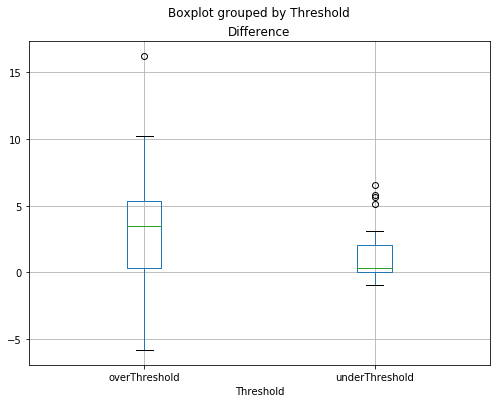

In [49]:
#creating a boxplot of this 
boxplotBig = DonegalOnly.boxplot(by = 'Threshold', column = ['Difference'], figsize=(8, 6))

Checking other counties, just in case but primarily focusing on donegal as it has the greatest bias.

In [50]:
DublinOnly = result.loc[result["Location"]== 'Dublin'].copy()
MayoOnly = result.loc[result["Location"]== 'Mayo'].copy()
WexfordOnly = result.loc[result["Location"]== 'Wexford'].copy()

In [51]:
DublinOnly['Threshold'] = np.where(DublinOnly['Amounts'] > DublinOnly["Amounts"].mean(), 'overThreshold', 'underThreshold')
MayoOnly['Threshold'] = np.where(MayoOnly['Amounts'] > MayoOnly["Amounts"].mean(), 'overThreshold', 'underThreshold')
WexfordOnly['Threshold'] = np.where(WexfordOnly['Amounts'] > WexfordOnly["Amounts"].mean(), 'overThreshold', 'underThreshold')

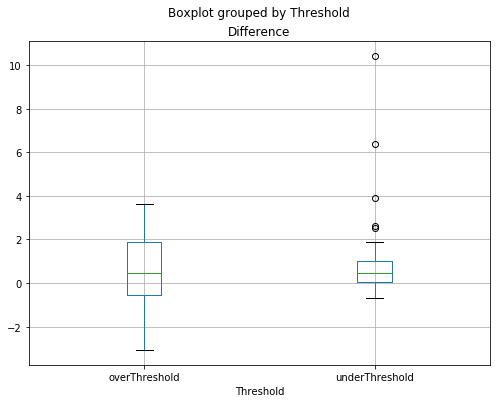

In [52]:
boxplotBig = DublinOnly.boxplot(by = 'Threshold', column = ['Difference'], figsize=(8, 6))

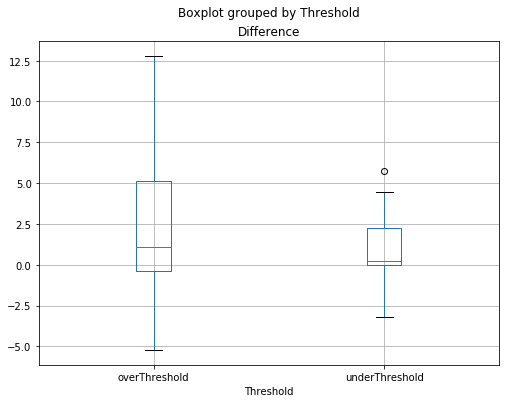

In [53]:
boxplotBig = MayoOnly.boxplot(by = 'Threshold', column = ['Difference'], figsize=(8, 6))

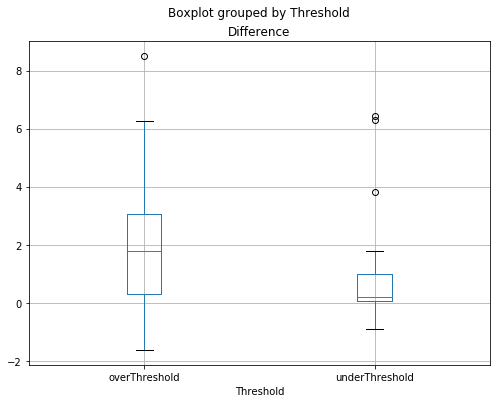

In [54]:
boxplotBig = WexfordOnly.boxplot(by = 'Threshold', column = ['Difference'], figsize=(8, 6))

 # Seeing Bias in Different Counties

In [55]:
result['Threshold'] = np.where(result['Amounts'] > result["Amounts"].mean(), 'overThreshold', 'underThreshold')

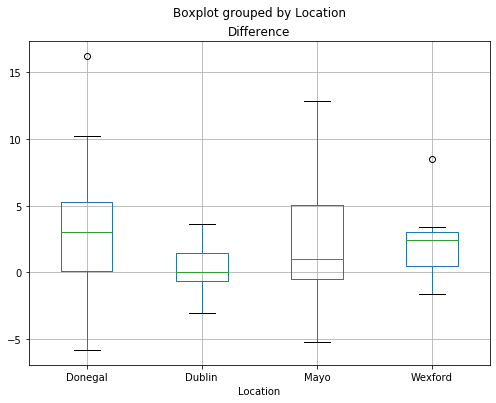

In [57]:
#creating df to visualise all counties over the threshold 
OverOnly = result.loc[result["Threshold"]== 'overThreshold'].copy()
#creating boxplot
boxplotOver = OverOnly.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))

# Total Amount of Rain for each county

In [45]:
#sum of the counties of observed amountis
DubTotal = result.loc[result['Location'] == 'Dublin', 'Amounts'].sum()
DonTotal = result.loc[result['Location'] == 'Donegal', 'Amounts'].sum()
MayTotal = result.loc[result['Location'] == 'Mayo', 'Amounts'].sum()
WexTotal = result.loc[result['Location'] == 'Wexford', 'Amounts'].sum()

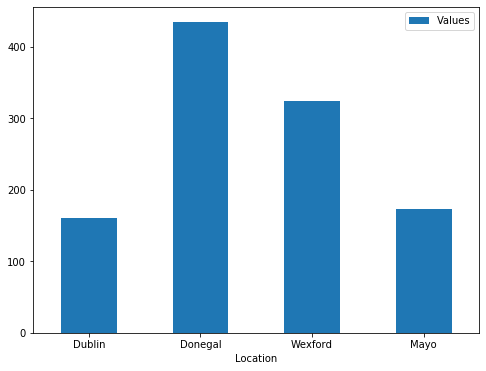

In [46]:
#creating df for barchart
df1 = pd.DataFrame({'Location':['Dublin', 'Donegal', 'Wexford', 'Mayo'], 'Values':[DubTotal, DonTotal, MayTotal, WexTotal]})
ax = df1.plot.bar(x= 'Location', y= 'Values', rot=0, figsize=(8, 6))

In [47]:
#getting amount of data days 
len(result)/4

57.0